### Task #4: Decision Tree Algorithm

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.

Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

### Task

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

### Import all Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import Dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df_new=df.rename(columns={'SepalLengthCm':'Sepal_Length','SepalWidthCm':'Sepal_Width',
                          'PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_Width'})
df_new.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring our DataSet

In [4]:
df_new.shape

(150, 6)

In [5]:
df_new.describe(include='all')

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking null Vaules
df_new.isnull().sum()

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [8]:
df_new=df_new.drop(['Species','Id'],axis=1)
df_new.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Build Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
X=df_new
y=df["Species"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
X_train

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
64,5.6,2.9,3.6,1.3
129,7.2,3.0,5.8,1.6
18,5.7,3.8,1.7,0.3
76,6.8,2.8,4.8,1.4
20,5.4,3.4,1.7,0.2
...,...,...,...,...
116,6.5,3.0,5.5,1.8
138,6.0,3.0,4.8,1.8
114,5.8,2.8,5.1,2.4
104,6.5,3.0,5.8,2.2


In [13]:
y_train

64     Iris-versicolor
129     Iris-virginica
18         Iris-setosa
76     Iris-versicolor
20         Iris-setosa
            ...       
116     Iris-virginica
138     Iris-virginica
114     Iris-virginica
104     Iris-virginica
130     Iris-virginica
Name: Species, Length: 120, dtype: object

In [14]:
tree1=DecisionTreeClassifier(criterion='entropy')
tree1.fit(X_train,y_train)
y_pred=tree1.predict(X_test)

In [15]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [16]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]


In [17]:
# calculating accuracy of maodel
print(accuracy_score(y_pred,y_test))

0.9333333333333333


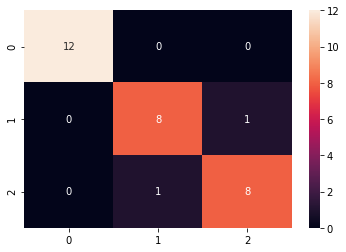

In [18]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.show()

In [19]:
cols=list(df_new.columns.values)
cols

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [20]:
from sklearn import tree

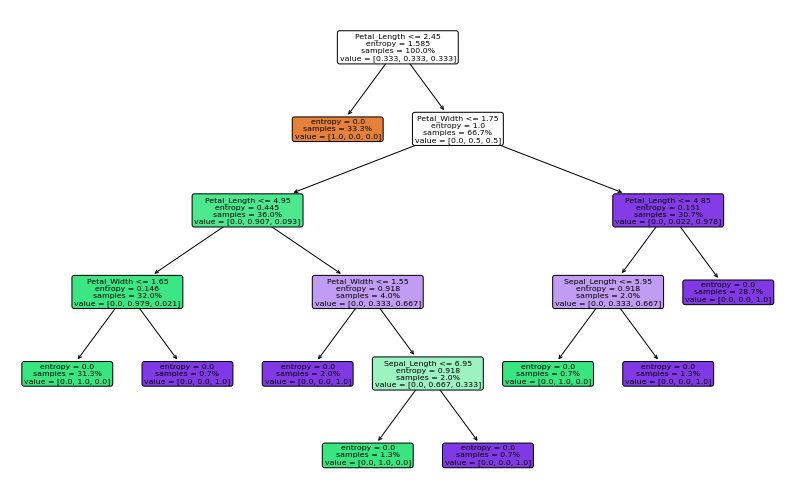

In [24]:
plt.figure(figsize=(14,9))
tree.plot_tree(tree1.fit(X,y),feature_names=cols,filled=True,precision=3,
              proportion=True,rounded=True)
plt.show()